# Global Sales Analysis

## STEP 2A - Analysis of "Sales 2012" Dataset
By **Daniel Palacio** (github.com/palaciodaniel) - November 2021

In [1]:
import pandas as pd
import seaborn as sns

### Dataset loading and displaying of general features

In [2]:
df_sales2012 = pd.read_excel("Sales 2012.xlsx")
df_sales2012.head(10)

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
0,1,-513.15,10012715,2012-12-31,-573.3835,2012-12-31,118960,Cutting Edge Sliced Ham,10696,-60.23,215785,-,-573.38,-1.0,180
1,2,-105.93,10012715,2012-12-31,-204.6638,2012-12-31,118960,Washington Cranberry Juice,10009,-98.73,215785,-,-204.66,-2.0,180
2,3,-88.07,10012715,2012-12-31,-165.8016,2012-12-31,118960,Moms Sliced Ham,10385,-77.73,215785,-,-165.80,-3.0,180
3,4,-43.12,10012715,2012-12-31,-118.3703,2012-12-31,118960,Tip Top Lox,10215,-75.25,215785,-,-118.37,-1.0,180
4,5,-37.98,10012715,2012-12-31,-102.3319,2012-12-31,118960,Just Right Beef Soup,10965,-64.35,215785,-,-102.33,-1.0,180
5,6,-49.37,10012715,2012-12-31,-85.5766,2012-12-31,118960,Fantastic Pumpernickel Bread,10901,-36.21,215785,-,-85.58,-1.0,180
6,7,-45.81,10012715,2012-12-31,-68.4399,2012-12-31,118960,Gorilla 1% Milk,10681,-22.63,215785,-,-68.44,-1.0,180
7,8,-12.56,10012715,2012-12-31,-67.3822,2012-12-31,118960,Pearl Chardonnay,10898,-54.82,215785,-,-67.38,-1.0,180
8,9,-13.42,10012715,2012-12-31,-16.1534,2012-12-31,118960,Blue Label Fancy Canned Oysters,10035,-2.73,215785,-,-16.15,-2.0,180
9,24,0.38,10019942,2012-12-31,1.4380,2012-12-31,119167,Super Vegetable Oil,10291,1.06,216691,-,1.44,1.0,109


In [3]:
# Number of observations and number of columns
df_sales2012.shape

(36444, 15)

In [4]:
# Information about dataset columns
df_sales2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36444 entries, 0 to 36443
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   %KEY                    36444 non-null  int64         
 1   Cost                    36444 non-null  float64       
 2   Customer Number         36444 non-null  int64         
 3   Date                    36444 non-null  datetime64[ns]
 4   GrossSales              36444 non-null  float64       
 5   Invoice Date            36444 non-null  datetime64[ns]
 6   Invoice Number          36444 non-null  int64         
 7   Item Desc               36444 non-null  object        
 8   Item Number             36444 non-null  int64         
 9   Margin                  36444 non-null  float64       
 10  Order Number            36444 non-null  int64         
 11  Promised Delivery Date  36444 non-null  object        
 12  Sales                   36444 non-null  float6

In [5]:
# Statistical information about the dataset
df_sales2012.describe()

,%KEY,Cost,Customer Number,GrossSales,Invoice Number,Item Number,Margin,Order Number,Sales,Sales Qty,Sales Rep Number
count,36444.000000,36444.000000,3.644400e+04,36444.000000,36444.000000,36444.000000,36444.000000,36444.000000,36444.000000,36444.000000,36444.000000
mean,61368.680661,669.052361,1.001709e+07,1148.047099,315831.484744,10512.701487,433.277304,113533.177697,1102.329664,19.983240,137.480738
std,31369.544269,6716.784909,6.951365e+03,10661.311944,14243.613761,291.776337,3650.108748,9435.158269,10236.068729,308.410624,26.316921
min,1.000000,-9392.930000,1.000000e+07,-17362.200000,118960.000000,10002.000000,-9729.990000,100012.000000,-16667.710000,-75.000000,103.000000
25%,32356.750000,16.020000,1.001223e+07,40.038600,308583.000000,10267.000000,16.350000,106550.000000,38.440000,1.000000,114.000000
50%,64603.500000,58.160000,1.001919e+07,119.984500,316345.000000,10527.000000,48.645000,112878.000000,115.180000,1.000000,132.000000
75%,88776.250000,191.680000,1.002246e+07,342.176000,324412.000000,10797.000000,134.500000,119842.000000,328.482500,3.000000,160.000000
max,110229.000000,366576.000000,1.002758e+07,539200.000000,332847.000000,11971.000000,164339.200000,216809.000000,517632.000000,16000.000000,185.000000


In [6]:
# Column "Sales Qty" will be transformed to "int" type. After checking it there was confirmation that it refers to
# the number of sales. Therefore, there cannot be "half sale"; it contains discrete values.

df_sales2012["Sales Qty"] = df_sales2012["Sales Qty"].astype("int64")

### Exploratory Data Analysis

In [7]:
# Does the column "GrossSales" contain the same values as "Sales", but rounded? This would seem to suggest
# the first 50 observations.

(df_sales2012["GrossSales"].round(2) == df_sales2012["Sales"].round(2)).sum()

122

No, that was the case in only 122, and 50 of them happened to be the first observations in the dataset. Let's check if using the "tail" command help us to clarify the confusion:

In [8]:
# It can be seen that on subsequent columns this issue is not present.

df_sales2012[["GrossSales", "Sales"]].tail(10)

,GrossSales,Sales
36434,2863.1270,2748.60
36435,3134.0448,3008.68
36436,4063.5072,3900.97
36437,6777.8688,6506.76
36438,9665.6960,9279.07
36439,9946.0548,9548.21
36440,11190.9600,10743.32
36441,13706.3520,13158.10
36442,23431.3254,22494.08
36443,52469.6480,50370.86


In [9]:
# Are there observations on "Sales" with bigger values than "GrossSales", which would led us to think
# they are swapped?

(df_sales2012["Sales"].round(2) > df_sales2012["GrossSales"].round(2)).sum()

960

In [10]:
# Which ones are those observations?

df_sales2012[df_sales2012["Sales"].round(2) > df_sales2012["GrossSales"].round(2)]

,%KEY,Cost,Customer Number,Date,GrossSales,Invoice Date,Invoice Number,Item Desc,Item Number,Margin,Order Number,Promised Delivery Date,Sales,Sales Qty,Sales Rep Number
111,3428,-513.15,10012226,2012-01-12,-573.3835,2012-01-12,318960,Cutting Edge Sliced Ham,10696,-37.29,115785,-,-550.44,-1,180
112,3429,-105.93,10012226,2012-01-12,-204.6638,2012-01-12,318960,Washington Cranberry Juice,10009,-90.54,115785,-,-196.47,-2,180
113,3430,-88.07,10012226,2012-01-12,-165.8016,2012-01-12,318960,Moms Sliced Ham,10385,-71.10,115785,-,-159.17,-3,180
114,3431,-43.12,10012226,2012-01-12,-118.3703,2012-01-12,318960,Tip Top Lox,10215,-70.52,115785,-,-113.64,-1,180
115,3432,-37.98,10012226,2012-01-12,-102.3319,2012-01-12,318960,Just Right Beef Soup,10965,-60.26,115785,-,-98.24,-1,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35719,109247,-0.81,10005376,2012-12-27,-2.2579,2012-12-27,326636,Tell Tale Asparagus,10484,-1.36,121607,-,-2.17,-1,109
35907,109456,-544.55,10019194,2012-12-28,-1057.6718,2012-12-28,326639,Ebony Prepared Salad,10799,-470.81,121609,-,-1015.36,-2,108
35908,109457,-75.25,10024743,2012-12-28,-135.4176,2012-12-28,326641,Tell Tale Lettuce,10492,-54.75,121613,-,-130.00,-1,113
36071,109637,-124.74,10023524,2012-12-29,-189.6212,2012-12-29,326644,High Top Asparagus,10173,-57.30,121615,-,-182.04,-1,103


These observations are displayed as if "Sales" had a bigger value than "GrossSales" due to the fact they were wrongfully computed with negative numbers, therefore, it is expected that they are considered as bigger due to this error.

In [11]:
# Is the column "Promised Delivery Date" empty? It would seem like all the observations only feature
# a "-" sign.

df_sales2012["Promised Delivery Date"].value_counts()

# Yes, it is empty. All the observations are "-".

-    36444
Name: Promised Delivery Date, dtype: int64

In [12]:
# Are "Date" and "Invoice Date" similar?
(df_sales2012["Date"] == df_sales2012["Invoice Date"]).sum()

# Yes.

36444

In [13]:
# Could the column %KEY be considered as a mere ID, and therefore be unnecessary due to 
# the dataset already having an index?
df_sales2012["%KEY"].nunique()

# Yes, all its values are unique.

36444

In [14]:
# Does the column "Invoice Number" repeat values?

# Yes, there are values that repeat more than once.

df_sales2012["Invoice Number"].nunique()

14257

In [15]:
# Does the column "Order Number" repeat values as well?

# Indeed, there are values that repeat more than once.

df_sales2012["Order Number"].nunique()

10703

In [16]:
# Does the column "Margin" make the correct calculation, which is the difference between "Sales" and "Cost"?

(df_sales2012["Margin"].round(2) == (df_sales2012["Sales"] - df_sales2012["Cost"]).round(2)).sum()

# "Margin" is completely reliable. Note that numbers were rounded to
# avoid wrong calculations between "floats".

36444

In [17]:
# Number of observations with negative values in "Sales"...

# Answer: 969 observations.

negative_sales = df_sales2012[df_sales2012["Sales"] <= 0].index
negative_sales

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
              111,
            ...
            35714, 35715, 35716, 35717, 35718, 35719, 35907, 35908, 36071,
            36072],
           dtype='int64', length=969)

In [18]:
# ... "Cost"...

(df_sales2012["Cost"] <= 0).sum()

1078

In [19]:
# ... "GrossSales"...

(df_sales2012["GrossSales"] <= 0).sum()

969

In [20]:
# ... "Margin"...

(df_sales2012["Margin"] <= 0).sum()

1532

In [21]:
# ... and "Sales Qty"?

(df_sales2012["Sales Qty"] <= 0).sum()

971

<AxesSubplot:>

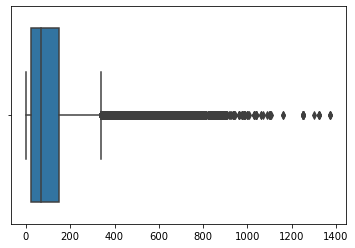

In [22]:
# Between what values do unit price per product oscillate?

# It is fundamental to know this, given that despite efforts to investigate about it, the currency in which 
# the sums were computed is unknown. This is critical because, for instance, 20 American dollars are not equal to 
# 20 Argentine pesos.

# Even more, there is a chance that the prices are not standardized to a single currency, which would mean that
# they simply were computed according to the currency of the city where the sale was made, without a proper 
# conversion to a unique currency.

sns.boxplot(x = (df_sales2012["Sales"] / df_sales2012["Sales Qty"]).round(2))

In [23]:
# Number of observations whose calculation of "Sales" over "Sales Qty" output outliers.

number_observations = []
unity_price = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 
               700, 750, 800, 850, 900, 950, 1000, 1050, 1100,
               1150, 1200, 1250, 1300, 1350]

for value in unity_price:
    number_observations.append(((df_sales2012["Sales"] / df_sales2012["Sales Qty"]) > value).sum())

print("Number of Observations:", number_observations)
print("Price per Unity:", unity_price)

Number of Observations: [6777, 5945, 4866, 4362, 4135, 3500, 3148, 2603, 1897, 1502, 1064, 924, 437, 322, 125, 77, 48, 34, 24, 22, 20, 20, 10, 5]
Price per Unity: [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350]


<AxesSubplot:xlabel='Price per Unity', ylabel='Number of Observations'>

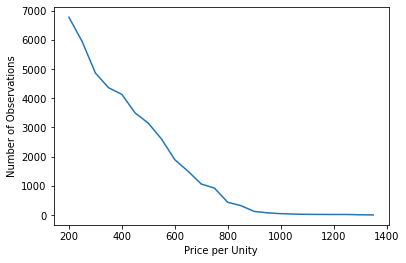

In [24]:
outliers = pd.DataFrame({"Price per Unity": unity_price, "Number of Observations": number_observations})
    
sns.lineplot(data = outliers, x = "Price per Unity", y = "Number of Observations")

In [25]:
# Notice the extreme values above the threshold of $350 per product. For instance, 
# observation 94, with cookies whose price is $563.61.

df_sales2012[(df_sales2012["Sales"] / df_sales2012["Sales Qty"]) > 350][["Item Desc", "Sales", "Sales Qty"]]

,Item Desc,Sales,Sales Qty
0,Cutting Edge Sliced Ham,-573.38,-1
94,Best Choice Graham Crackers,563.61,1
96,Even Better 1% Milk,741.45,1
97,Just Right Fancy Canned Sardines,743.04,2
98,Better Fancy Canned Sardines,824.39,1
...,...,...,...
36432,Golden Frozen Chicken Thighs,2272.32,4
36436,Gorilla Cheese Spread,3900.97,4
36438,Bravo Large Canned Shrimp,9279.07,20
36442,Imagine Popsicles,22494.08,42


In [26]:
df_sales2012[df_sales2012["Item Desc"] == "Best Choice Graham Crackers"][["Item Desc", "Sales", "Sales Qty"]]

# It is interesting to see how the unit price varies, after filtering observations by a specific product.
# Possibilities:
# - Data entry errors?
# - Non-standardized price? (Just showing the price in the currency of every city?)
# - Price that was converted to a single currency, which simply shows the different prices in every city?

,Item Desc,Sales,Sales Qty
94,Best Choice Graham Crackers,563.61,1
1367,Best Choice Graham Crackers,23.21,10
1707,Best Choice Graham Crackers,15.88,50
1952,Best Choice Graham Crackers,6.36,20
4298,Best Choice Graham Crackers,1.63,5
5089,Best Choice Graham Crackers,0.33,1
7032,Best Choice Graham Crackers,1.98,6
7042,Best Choice Graham Crackers,13.09,22
7641,Best Choice Graham Crackers,10876.59,22
7794,Best Choice Graham Crackers,1.27,4


### Data Cleaning

In [27]:
# Deletion of "Invoice Date", "%KEY" and "Promised Delivery Date". They do not provide new information.

df_sales2012.drop(["%KEY", "Invoice Date", "Promised Delivery Date"],axis = 1, inplace = True)
df_sales2012.columns

Index(['Cost', 'Customer Number', 'Date', 'GrossSales', 'Invoice Number',
       'Item Desc', 'Item Number', 'Margin', 'Order Number', 'Sales',
       'Sales Qty', 'Sales Rep Number'],
      dtype='object')

In [28]:
# Columns "Invoice Number", "Order Number" and "Sales Rep Number" will not be used.

df_sales2012.drop(["Invoice Number", "Order Number", "Sales Rep Number"],axis = 1, inplace = True)
df_sales2012.columns

Index(['Cost', 'Customer Number', 'Date', 'GrossSales', 'Item Desc',
       'Item Number', 'Margin', 'Sales', 'Sales Qty'],
      dtype='object')

In [29]:
# Reordering remaining columns: "Date", "Item Number", "Item Desc", "Cost", "Margin", "Sales", "GrossSales",
# "Sales Qty", "Customer Number", "Sales Rep Number", "Invoice Number", "Order Number"

df_sales2012 = df_sales2012.reindex(columns = ["Date", "Item Number", "Item Desc", 
                           "Cost", "Margin", "Sales", "GrossSales", 
                           "Sales Qty", "Customer Number"])
df_sales2012.head()

,Date,Item Number,Item Desc,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
0,2012-12-31,10696,Cutting Edge Sliced Ham,-513.15,-60.23,-573.38,-573.3835,-1,10012715
1,2012-12-31,10009,Washington Cranberry Juice,-105.93,-98.73,-204.66,-204.6638,-2,10012715
2,2012-12-31,10385,Moms Sliced Ham,-88.07,-77.73,-165.80,-165.8016,-3,10012715
3,2012-12-31,10215,Tip Top Lox,-43.12,-75.25,-118.37,-118.3703,-1,10012715
4,2012-12-31,10965,Just Right Beef Soup,-37.98,-64.35,-102.33,-102.3319,-1,10012715


It is pretty clear that there are several columns with negative values that must be investigated. They were identified in case further exploration was desired. Given that the datasets were not supplemented with descriptions for each column, more investigations in this sense will be needed as well.

For the present analysis only "Sales" column matter, which will be used for the visualizations. For this reason, observations with negative values will be eliminated, because considering the dataset contains approximately 36500 observations, removing those 900 faulty observations will not become a critical inconvenience.

In [30]:
df_sales2012.drop(negative_sales, inplace = True)
df_sales2012.describe()

,Item Number,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
count,35475.000000,35475.000000,35475.000000,35475.000000,35475.000000,35475.000000,3.547500e+04
mean,10512.908358,692.928213,448.887242,1141.815455,1189.170662,20.601776,1.001712e+07
std,292.036694,6805.617979,3697.564553,10370.709629,10801.546337,312.569842,6.969882e+03
min,10002.000000,0.000000,-3764.400000,0.010000,0.005500,0.000000,1.000000e+07
25%,10267.000000,18.800000,18.170000,43.430000,45.239000,1.000000,1.001223e+07
50%,10527.000000,61.190000,50.470000,119.420000,124.399000,2.000000,1.001919e+07
75%,10797.000000,204.735000,140.940000,340.400000,354.532400,3.000000,1.002246e+07
max,11971.000000,366576.000000,164339.200000,517632.000000,539200.000000,16000.000000,1.002758e+07


In [31]:
# Now that we removed the observations with negative values, how many observations
# in "Sales" would feature bigger values than "GrossSales", which now indeed would lead us to believe 
# they are inverted?

(df_sales2012["Sales"].round(2) > df_sales2012["GrossSales"].round(2)).sum()

0

Regarding the outliers, a decision was made to remove them completely, given that the cost of losing a few thousand observations is lesser than having observations about mundane products with an exhorbitantly wrong price per unit. There is a risk of these outliers leading to overestimate the profits that the visualizations will output, which would represent a serious risk from a commercial standpoint, therefore it is mandatory to adopt the most conservative and cautious approach as possible.

To make this decision the supplementary "Item Master" dataset was inspected, which allowed to confirm that all the products are food and drinks of daily use. There were not other products, like appliances, that would justify the existence of these outliers.

Obviously, an optimal scenario would have been to have the information about what exact currency are these sales values being expressed, which would have helped a lot to arrive to more concrete conclusions. However, with all the explained reasoning the chosen course of action is considered to be justified.

However, now it must be considered that, for a matter of equality, the selected threshold to establish the unit price cut-off must be the same for both this dataset and the complimentary one ("Sales 2013-14"), because otherwise we would be generating an unnecessary bias, given that both datasets showcase sales from the same edible products.

After analyzing both line plots, it was concluded that a maximum unit price of $225 is the threshold that definitely removes all the outliers, while at the same time avoids the deletion of valid observations. The proportion of deletions will not be that uneven, because it must be remembered that in this dataset there is only a year of observations, not one and a half.

In [32]:
df_sales2012 = df_sales2012[((df_sales2012["Sales"] / df_sales2012["Sales Qty"]).round(2)) < 225]
df_sales2012.shape

(29288, 9)

<AxesSubplot:>

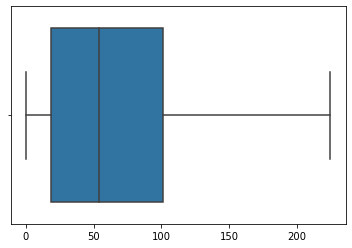

In [33]:
sns.boxplot(x = (df_sales2012["Sales"] / df_sales2012["Sales Qty"]).round(2))

In [34]:
# Making sure that columns with monetary values do not have more than two decimals

df_sales2012[["Cost", "Margin", "Sales", "GrossSales"]] = \
    df_sales2012[["Cost", "Margin", "Sales", "GrossSales"]].round(2)

In [35]:
df_sales2012.describe()

,Item Number,Cost,Margin,Sales,GrossSales,Sales Qty,Customer Number
count,29288.000000,29288.000000,29288.000000,29288.000000,29288.000000,29288.000000,2.928800e+04
mean,10505.220534,532.964090,325.687167,858.651257,894.278909,23.771476,1.001714e+07
std,283.925777,7272.604262,3852.897702,10993.881072,11450.873131,343.819828,6.982669e+03
min,10002.000000,0.000000,-3764.400000,0.010000,0.010000,1.000000,1.000000e+07
25%,10267.000000,13.530000,14.690000,30.680000,31.960000,1.000000,1.001223e+07
50%,10507.000000,44.700000,38.160000,87.955000,91.550000,2.000000,1.001919e+07
75%,10717.000000,101.530000,79.147500,177.600000,185.000000,3.000000,1.002246e+07
max,11971.000000,366576.000000,164339.200000,517632.000000,539200.000000,16000.000000,1.002758e+07


In [36]:
# Having finished with data cleaning, it is time to save the changes in a new XLSX file.

df_sales2012.to_excel("cleaned_sales2012.xlsx", 
                       sheet_name = "Sales 2012", 
                       columns = df_sales2012.columns)